#  아이리스 데이터 


##아이리스 형태 분석

In [0]:
def columnReplace(columns):
  new_column = []
  for i in columns:
    v = i.replace(" ", "_").replace("(", "").replace(")", "")

    new_column.append(v)
  return new_column

In [0]:
import numpy as np
import pandas as pd
import sqlite3
from sklearn import datasets 


##To SQL

In [0]:
iris = datasets.load_iris()

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
pd_iris_target = pd.DataFrame(iris.target, columns=['target'])

In [0]:
pd_iris_target['target_name'] = pd_iris_target['target'].apply(lambda x: 'setosa' if x == 0 else 'versicolor' if x == 1 else 'virginica' if x == 2 else x )

In [0]:
pd_iris_target

,target,target_name
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


In [0]:
pd_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [0]:
pd_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [0]:
pd_iris.columns = columnReplace(pd_iris.columns)

In [0]:
pdd = pd.concat([pd_iris, pd_iris_target], axis=1)

In [0]:
pdd

2

In [0]:
conn = sqlite3.connect('iris.db')

In [0]:
pdd.to_sql('iris_table', conn, if_exists='replace', index=False)

##DES

In [0]:
print(type(iris), iris.DESCR)

In [0]:
type(iris)

sklearn.utils.Bunch

In [0]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 아이리스 데이터 키 설명



***data*** : 각 꽃의 특성

***target*** : 0, 1, 2  꽃 종류 구분하기 위해 매김 

***target_names*** : 꽃 이름들 

0 : *setosa*, 1 : *versicolor*, 2 : *virginica*

***DESCR*** : iris 데이터에 대한 설명

***feature_names*** : 데이터의 특성 이름  꽃받침 길이, 폭, 꽃잎 길이, 폭 

***data*** 수치들이 뭘 나타내는가

***filename*** : 데이터를 불러온 파일의 경로 및 이름

data 150개

In [0]:
len(iris.data)

150

target 150개

In [0]:
len(iris.target)

150

target_names 타겟이름 (꽃이름)

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

target_names (data 특성 이름)

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

파일경로

In [0]:
iris.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [0]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [0]:
len(setosa)

50

In [0]:
len(versicolor)

50

In [0]:
len(virginica)

50

# iris 기술통계

In [0]:
setosa = iris.data[iris.target==0]
versicolor =  iris.data[iris.target==1]
virginica = iris.data[iris.target==2]

In [0]:
flower = [setosa, versicolor, virginica]

In [0]:
n = 0
for j in flower:
  print(iris.target_names[n])
  for i in range(len(iris.feature_names)):
    print('특징 :', iris.feature_names[i])
    print('총합 :', j[:, i].sum())
    print('평균 :', j[:, i].mean())
    print('중간값 :', np.median(j[:, i]))
    print('분산 :', j[:, i].var())
    print('표준편차 :', j[:, i].std())
    print('최대값 :', j[:, i].max())
    print('최소값 :', j[:, i].min())
    print('\n')
  n = n + 1


In [0]:
n = 0

for j in flower:
  print(iris.target_names[n])
  for i in range(len(iris.feature_names)):
    x = j[:, i]
    x_mean = x.mean()
    x_median = np.median(x)
    x_std = x.std()

    mask_1 = ((x >= x_mean - 0.05*x_mean) & (x <= x_mean + 0.05*x_mean))
    mask_2 = ((x >= x_median - 0.05*x_median) & (x <= x_median + 0.05*x_median))
    mask_3 = ((x >= x_std - 0.05*x_std) & (x <= x_std + 0.05*x_std))

    selected_1 = x[mask_1]
    selected_2 = x[mask_2]
    selected_3 = x[mask_3]

    print('범위 안에 들어가는 값 개수')
    print(iris.feature_names[i])
    print('평균 :', len(selected_1))
    print('중간값 :',len(selected_2))
    print('표준편차 :',len(selected_3))
    print('\n')
  n = n + 1

#iris matplotlib

In [0]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [0]:
setosa = iris.data[iris.target==0]
versicolor =  iris.data[iris.target==1]
virginica = iris.data[iris.target==2]

In [0]:
setosa_sepal_length = setosa[:,0]
setosa_sepal_width = setosa[:,1]
setosa_petal_length = setosa[:,2]
setosa_petal_width = setosa[:,3]

versicolor_sepal_length = versicolor[:,0]
versicolor_sepal_width = versicolor[:,1]
versicolor_petal_length = versicolor[:,2]
versicolor_petal_width = versicolor[:,3]

virginica_sepal_length = virginica[:,0]
virginica_sepal_width = virginica[:,1]
virginica_petal_length = virginica[:,2]
virginica_petal_width = virginica[:,3]

In [0]:
setosa_sepal_length

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

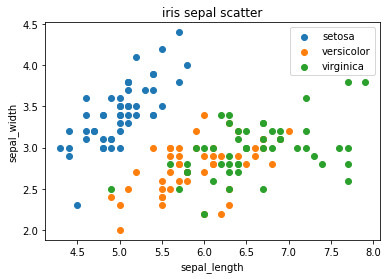

In [0]:
plt.scatter(setosa_sepal_length, setosa_sepal_width, label='setosa')
plt.scatter(versicolor_sepal_length, versicolor_sepal_width, label='versicolor')
plt.scatter(virginica_sepal_length, virginica_sepal_width, label='virginica')

plt.title('iris sepal scatter')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

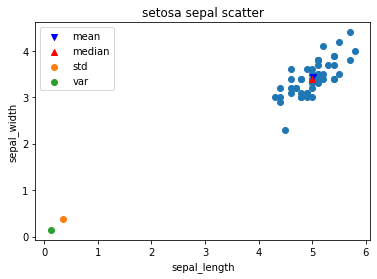

In [0]:
plt.scatter(setosa_sepal_length, setosa_sepal_width)
plt.scatter(setosa_sepal_length.mean(), setosa_sepal_width.mean(), marker='v', color='b', label = 'mean')
plt.scatter(np.median(setosa_sepal_length), np.median(setosa_sepal_width), marker='^', color='r',  label = 'median')
plt.scatter(setosa_sepal_length.std(), setosa_sepal_width.std(), label = 'std')
plt.scatter(setosa_sepal_length.var(), setosa_sepal_width.var(), label = 'var')

plt.title('setosa sepal scatter')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

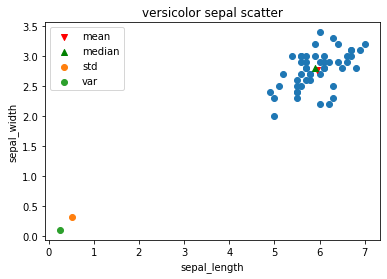

In [0]:
plt.scatter(versicolor_sepal_length, versicolor_sepal_width)
plt.scatter(versicolor_sepal_length.mean(), versicolor_sepal_width.mean(), marker='v', color='r', label = 'mean')
plt.scatter(np.median(versicolor_sepal_length), np.median(versicolor_sepal_width), marker='^', color='g', label = 'median')
plt.scatter(versicolor_sepal_length.std(), versicolor_sepal_width.std(), label = 'std')
plt.scatter(versicolor_sepal_length.var(), versicolor_sepal_width.var(), label = 'var')



plt.title('versicolor sepal scatter')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

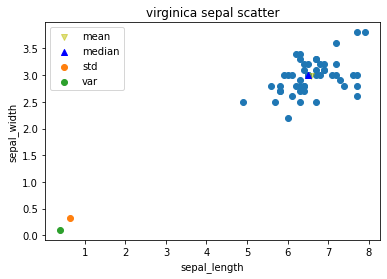

In [0]:
plt.scatter(virginica_sepal_length, virginica_sepal_width)
plt.scatter(virginica_sepal_length.mean(), virginica_sepal_width.mean(), marker='v', color='y', alpha=0.5, label = 'mean')
plt.scatter(np.median(virginica_sepal_length), np.median(virginica_sepal_width), marker='^', color='b', label = 'median')
plt.scatter(virginica_sepal_length.std(), virginica_sepal_width.std(), label = 'std')
plt.scatter(virginica_sepal_length.var(), virginica_sepal_width.var(), label = 'var')

plt.title('virginica sepal scatter')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

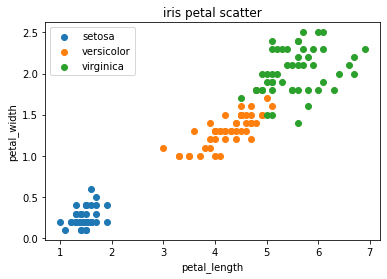

In [0]:
plt.scatter(setosa_petal_length, setosa_petal_width)
plt.scatter(versicolor_petal_length, versicolor_petal_width)
plt.scatter(virginica_petal_length, virginica_petal_width)

plt.title('iris petal scatter')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

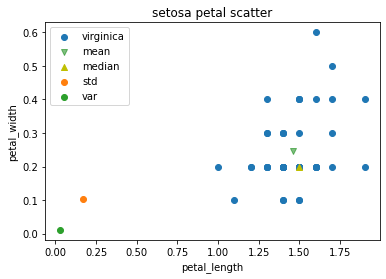

In [0]:
plt.scatter(setosa_petal_length, setosa_petal_width, label='virginica')
plt.scatter(setosa_petal_length.mean(), setosa_petal_width.mean(), marker='v', color='g', alpha=0.5, label = 'mean')
plt.scatter(np.median(setosa_petal_length), np.median(setosa_petal_width), marker='^', color='y', label = 'median')
plt.scatter(setosa_petal_length.std(), setosa_petal_width.std(), label = 'std')
plt.scatter(setosa_petal_length.var(), setosa_petal_width.var(), label = 'var')

plt.title('setosa petal scatter')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

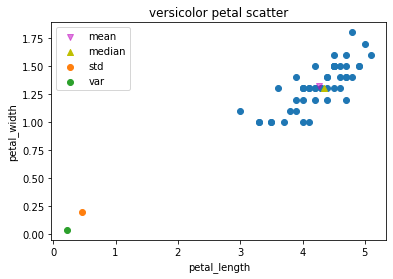

In [0]:
plt.scatter(versicolor_petal_length, versicolor_petal_width)
plt.scatter(versicolor_petal_length.mean(), versicolor_petal_width.mean(), marker='v', color='m', alpha=0.5, label = 'mean')
plt.scatter(np.median(versicolor_petal_length), np.median(versicolor_petal_width), marker='^', color='y', label = 'median')
plt.scatter(versicolor_petal_length.std(), versicolor_petal_width.std(), label = 'std')
plt.scatter(versicolor_petal_length.var(), versicolor_petal_width.var(), label = 'var')

plt.title('versicolor petal scatter')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

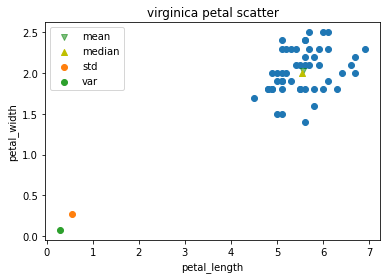

In [0]:
plt.scatter(virginica_petal_length, virginica_petal_width)
plt.scatter(virginica_petal_length.mean(), virginica_petal_width.mean(), marker='v', color='g', alpha=0.5, label = 'mean')
plt.scatter(np.median(virginica_petal_length), np.median(virginica_petal_width), marker='^', color='y', label = 'median')
plt.scatter(virginica_petal_length.std(), virginica_petal_width.std(), label = 'std')
plt.scatter(virginica_petal_length.var(), virginica_petal_width.var(), label = 'var')

plt.title('virginica petal scatter')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

# confusion

In [0]:
from sklearn import datasets, metrics, model_selection, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report


In [0]:
 iris = datasets.load_iris()

In [0]:
 X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data,iris.target, random_state=0)
 clf = linear_model.LogisticRegression()
 clf.fit(X_train, y_train)
 y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
 print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [0]:
 print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [0]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, linear_model


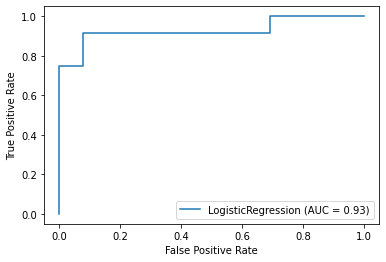

In [0]:
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = linear_model.LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
metrics.roc_auc_score(y_test,y_score,average='weighted')
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [0]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

In [0]:
iris_dataset = datasets.load_iris()
iris_data = iris_dataset.data
iris_target = iris_dataset.target

In [0]:
train_iris_data, test_iris_data, train_iris_target, test_iris_target = train_test_split(iris_data, iris_target, test_size=0.2)

In [0]:
decisionTree = DecisionTreeClassifier(random_state=0)


In [0]:
decisionTree.fit(train_iris_data, train_iris_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
predict_iris = decisionTree.predict(test_iris_data)

In [0]:
predict_iris

array([0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 1])

In [0]:
print(classification_report(test_iris_target, predict_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



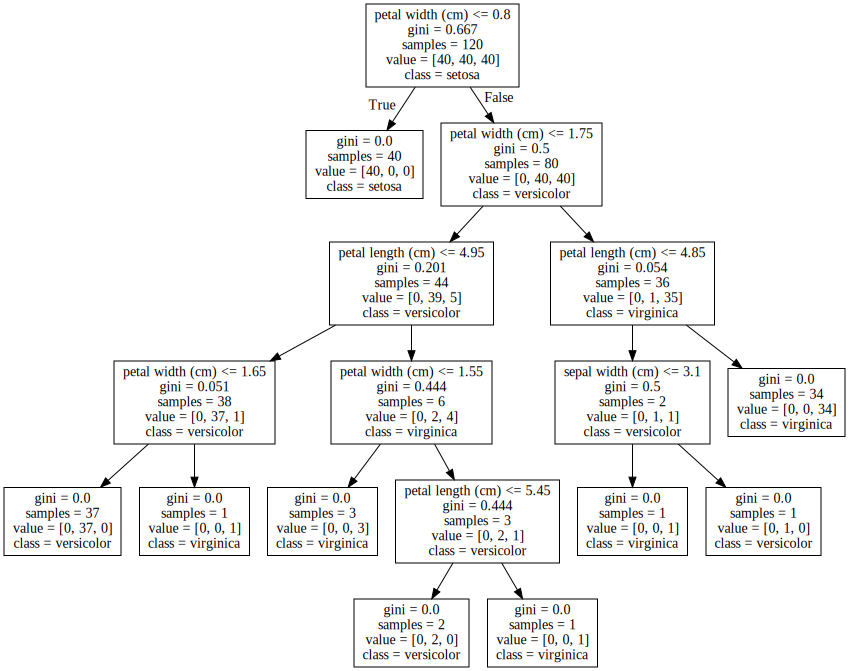

In [0]:
export_gp = export_graphviz(decisionTree, class_names=iris_dataset.target_names,
feature_names=iris_dataset.feature_names)
graphviz.Source(export_gp)